In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  log_loss
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv("train.gz", compression='gzip')

In [3]:
print(df.isnull().sum())

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64


No missing values observed

In [4]:
print(df.click.mean())

0.16980562476404604


The mean CTR across the dataset is roughly 17%

In [5]:
df.hour[:10]

0    14102100
1    14102100
2    14102100
3    14102100
4    14102100
5    14102100
6    14102100
7    14102100
8    14102100
9    14102100
Name: hour, dtype: int64

variable "hour" isn't very readable, we will fix that with the code below. Furthermore, we note that the data is sorted chronologically.

In [6]:
df['hour_corrected'] = df['hour'].apply(lambda x: str(x)[-2:])
df['day'] = df['hour'].apply(lambda x: str(x)[-4:-2])


Because not a lot of information is available on the variables, we don't have any other choice than to inspect all of the variables in more detail. We plot the average click rate per category for each variable, as well as the number of observations for such category.

In [7]:
pd.pivot_table(df, values = ['click'], index = ['hour_corrected'], aggfunc =[np.mean, len])

,mean,len
,click,click
hour_corrected,,
00,0.180351,845178
01,0.185774,984784
02,0.176108,1222672
03,0.174199,1399001
04,0.159567,1913348
05,0.163387,1982179
06,0.168116,1762743
07,0.179190,1857712


In [8]:
pd.pivot_table(df, values = ['click'], index = ['day'], aggfunc= [np.mean, len])

,mean,len
,click,click
day,,
21,0.174198,4122995
22,0.157167,5337126
23,0.182190,3870752
24,0.174716,3335302
25,0.182402,3363122
26,0.183049,3835892
27,0.181594,3225010
28,0.152182,5287222


In [9]:
pd.pivot_table(df, values = ['click'] , index = ['C1'], aggfunc= [np.mean, len])

,mean,len
,click,click
C1,,
1001,0.033393,9463
1002,0.210731,2220812
1005,0.169331,37140632
1007,0.039429,35304
1008,0.121652,5787
1010,0.095215,903457
1012,0.172493,113512


In [10]:
pd.pivot_table(df, values = ['click'] , index = ['banner_pos'], aggfunc= [np.mean, len])

,mean,len
,click,click
banner_pos,,
0,0.164272,29109590
1,0.183614,11247282
2,0.119222,13001
3,0.182801,2035
4,0.185358,7704
5,0.121495,5778
7,0.320100,43577


In [11]:
pd.pivot_table(df, values = ['click'], index = ['site_id'], aggfunc= [np.mean, len])

,mean,len
,click,click
site_id,,
000aa1a4,1.000000,2
00255fb4,0.068558,423
003cf93d,0.152778,72
00476056,0.142857,14
00564467,0.000000,1
...,...,...
ffcb6b9a,0.119549,7545
ffcff165,0.165997,747


In [12]:
pd.pivot_table(df, values = ['click'], index = ['site_domain'], aggfunc = [np.mean, len])

,mean,len
,click,click
site_domain,,
000129ff,0.000000,2
0035f25a,0.000000,1
004d30ed,0.000000,1
005b4641,1.000000,1
005b495a,0.359194,3029
...,...,...
ffdc5fcd,0.500000,2
ffde5f3b,0.000000,8


In [13]:
pd.pivot_table(df, values = ['click'], index = ['site_category'], aggfunc = [np.mean, len])

,mean,len
,click,click
site_category,,
0569f928,0.053958,17106
110ab22d,0.000000,6
28905ebd,0.208019,7377208
335d28a8,0.093644,136463
3e814130,0.283003,3050306
42a36e14,0.231014,2515
50e219e0,0.128580,16537234
5378d028,0.095238,483


In [14]:
pd.pivot_table(df, values = ['click'], index = ['app_id'], aggfunc = [np.mean, len])

,mean,len
,click,click
app_id,,
000d6291,0.021978,182
000f21f1,0.000000,2
00110ae2,0.111111,27
00119fc5,0.000000,2
0014fe4d,0.000000,4
...,...,...
ffdb187c,0.042857,140
ffdc498e,1.000000,8


In [15]:
pd.pivot_table(df, values = ['click'], index = ['app_domain'], aggfunc = [np.mean, len])

,mean,len
,click,click
app_domain,,
001b87ae,0.000000,1
002e4064,0.000000,33
00314725,0.000000,1
030e4250,0.000000,2
03da86e1,0.000000,1
...,...,...
fe369646,0.025641,39
fe5e664e,0.000000,2


In [16]:
pd.pivot_table(df, values = ['click'], index = ['app_category'], aggfunc = [np.mean, len])

,mean,len
,click,click
app_category,,
07d7df22,0.199148,26165592
09481d60,0.155194,54886
0bfbc358,0.016471,425
0d82db25,0.160000,25
0f2161f8,0.108118,9561058
0f9a328c,0.155265,5584
18b1e0be,0.070755,212
2281a340,0.013375,2243


In [17]:
pd.pivot_table(df, values = ['click'], index = ['device_id'], aggfunc = [np.mean, len])

,mean,len
,click,click
device_id,,
00000414,0.000,1
00000715,0.000,1
00000919,0.000,1
00000b7c,0.000,1
00001237,0.000,6
...,...,...
ffffd970,0.000,1
ffffd98b,0.125,8


In [18]:
pd.pivot_table(df, values = ['click'], index = ['device_model'], aggfunc = [np.mean, len])

,mean,len
,click,click
device_model,,
00097428,0.233850,2322
0009f4d7,0.169109,5186
000ab70c,0.000000,1
00161f51,0.394737,38
002ee63d,0.000000,1
...,...,...
ffe3ae81,0.182640,553
ffe69079,0.253910,5947


In [19]:
pd.pivot_table(df, values = ['click'], index = ['device_type'], aggfunc = [np.mean, len])

,mean,len
,click,click
device_type,,
0,0.210731,2220812
1,0.169176,37304667
2,0.064516,31
4,0.095444,774272
5,0.093842,129185


In [20]:
pd.pivot_table(df, values = ['click'], index = ['device_conn_type'], aggfunc = [np.mean, len])

,mean,len
,click,click
device_conn_type,,
0,0.181125,34886838
2,0.135289,3317443
3,0.044043,2181796
5,0.029611,42890


In [21]:
pd.pivot_table(df, values = ['click'], index = ['C14'], aggfunc = [np.mean, len])

,mean,len
,click,click
C14,,
375,0.230891,86976
376,0.277778,108
377,0.213909,78052
380,0.201186,74215
381,0.225704,4085
...,...,...
24046,0.000000,2
24047,0.250000,4


In [22]:
pd.pivot_table(df, values = ['click'], index = ['C15'], aggfunc = [np.mean, len])

,mean,len
,click,click
C15,,
120,0.018899,3069
216,0.127138,298794
300,0.359358,2337294
320,0.158608,37708959
480,0.267665,2137
728,0.056968,74533
768,0.425663,1621
1024,0.254688,2560


In [23]:
pd.pivot_table(df, values = ['click'], index = ['C16'], aggfunc = [np.mean, len])

,mean,len
,click,click
C16,,
20,0.018899,3069
36,0.127138,298794
50,0.158315,38136554
90,0.056968,74533
250,0.421347,1806334
320,0.267665,2137
480,0.214560,103365
768,0.254688,2560


In [24]:
pd.pivot_table(df, values = ['click'], index = ['C17'], aggfunc = [np.mean, len])

,mean,len
,click,click
C17,,
112,0.216550,243764
122,0.138898,235367
153,0.090086,13365
178,0.273055,251825
196,0.243277,4871
...,...,...
2754,0.038954,60584
2755,0.042973,50473


In [25]:
pd.pivot_table(df, values = ['click'], index = ['C18'], aggfunc = [np.mean, len])

,mean,len
,click,click
C18,,
0,0.158225,16939044
1,0.034176,2719623
2,0.294976,7116058
3,0.145953,13654242


In [26]:
pd.pivot_table(df, values = ['click'], index = ['C19'], aggfunc = [np.mean, len])

,mean,len
,click,click
C19,,
33,0.061630,478227
34,0.137013,263275
35,0.166803,12170630
38,0.174400,182787
39,0.244163,8829426
...,...,...
1711,0.227129,94378
1831,0.093356,23662


In [27]:
pd.pivot_table(df, values = ['click'], index = ['C20'], aggfunc = [np.mean, len])

,mean,len
,click,click
C20,,
-1,0.192793,18937918
100000,0.089420,139980
100001,0.172894,7762
100002,0.107297,7633
100003,0.046748,115705
...,...,...
100233,0.170096,118568
100241,0.131401,24391


In [28]:
pd.pivot_table(df, values = ['click'], index = ['C21'], aggfunc = [np.mean, len])

,mean,len
,click,click
C21,,
1,0.137430,3027
13,0.212600,384314
15,0.210885,766986
16,0.259501,347178
17,0.090817,166268
20,0.090086,13365
23,0.212944,8896205
32,0.230343,1783343


In [29]:
y = df.click
df = df.drop(['hour', 'id', 'site_id', 'site_domain','app_id', 'app_domain', 'device_id','device_model',
                'C14','C17', 'C20','click'  ], axis=1)

At this point we will have to make a choice which variables to use in our model. We decide to drop the variables mentioned above, because they simply have too many unique values in order for us to efficiently transform them using OneHotEncoding. This in itself is a pity, because e.g. the variable "site-id" seems to hold valuable information --> for different sites very different CTRs are observed

In [30]:
encoder = OneHotEncoder()
encoder.fit(df)

OneHotEncoder()

We have decided to try to fit the OneHotEncoding to the full dataset. Concious of the fact that this is a memory intensive operation, fitting the encoder to a smaller part of the dataset leads to more serious problems, namely: i) fitting the data on the first X number of rows, introduces the problem that the OneHotEncoder encounters categorical variables it has not seen before when transforming other parts of the data and ii) fitting the OneHotEncoder on separate chunks of data, introduces the problem that the feature matrix X can have a different shape for each chunk (i.e. you use different features for each partial fit iteration).

## Baseline Model - SGD --> Logistic Regression  using Batch Learning

In [31]:
X = encoder.transform(df.sample(frac=0.1, random_state=42))
y = y.sample(frac=0.1, random_state=42)
X.shape

(4042897, 6729754)

We train some baseline models on a fraction of the data, to see what the performance would be for Batch Learning vs. Online Learning. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, train_size=0.7, test_size = 0.3)
model = SGDClassifier(loss = 'log', random_state=42)

In [33]:
param_grid = {"alpha":[0.00005,  0.0001 , 0.0005,0.001] }
grid = GridSearchCV(model, param_grid = param_grid,return_train_score = True, cv=3, scoring = "neg_log_loss", n_jobs=-2)
grid.fit(X_train, y_train)
print(log_loss(y_test, grid.predict_proba(X_test)))
print('Best alpha:', grid.best_estimator_.get_params()['alpha'])

0.42332869003053336
Best alpha: 0.0001


The log loss achieved with batch learning is already pretty good, considering that the best team in the Kaggle competition achieved a log loss of 0.37 (https://www.kaggle.com/c/avazu-ctr-prediction/leaderboard)

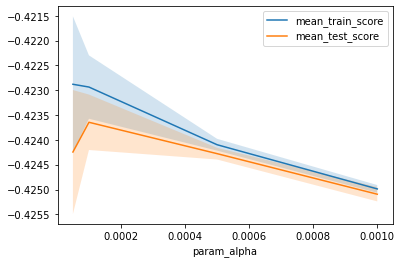

In [34]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

Preliminary results from the GridSearch leads us to conclude to stick with the default parameters of the SGD Classifier (alpha = 0.0001), considering the minimal differences between performance of the parameters

## Baseline Model - SGD --> Naive Bayes  using Batch Learning

In [35]:
model = MultinomialNB()

In [36]:
param_grid = {"alpha":[0.001, 0.01, 0.1, 1] }
grid = GridSearchCV(model, param_grid = param_grid,return_train_score = True, cv=3, scoring = "neg_log_loss", n_jobs=-2)
grid.fit(X_train, y_train)
print(log_loss(y_test, grid.predict_proba(X_test)))
print('Best alpha:', grid.best_estimator_.get_params()['alpha'])

0.5695307395392114
Best alpha: 0.1


Log loss is a bit higher as compared to Logistic Regression, this could be due to underlying correlations between the variables, which violates the conditional independence assumption.

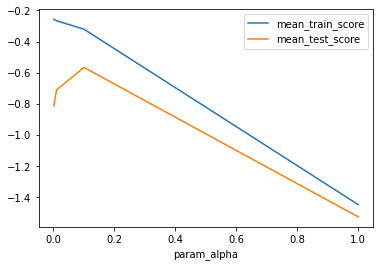

In [37]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

Default value of "1" does not seems to the most efficient parameter, we therefore choose alpha = 0.1 for the model trained using Online Learning.

## Online Learning Logistic SGD Classifier

In [38]:
#df = pd.read_csv("train.gz", compression='gzip')
#df = df.sample(frac = 1)
#df.to_csv('train_shuffled.gz', index=False)

given the records are sorted chronologically, we shuffle the data in order for the "chunks" to be truly randomly picked. If we wouldn't do this, the data would just start with the earliest observation, which might not make a lot of sense. We write the shuffled dataframe to a csv file.

In [43]:
reader = pd.read_csv("train_shuffled.gz", compression='gzip', chunksize=1000)
model = SGDClassifier(loss = 'log', random_state=42, n_jobs=-2)
loops = 4000
a = 0
SVD_conv = pd.DataFrame()

In [44]:
for df in reader:
    if a > loops:
        break
    a = a + 1
    #transform data to desirable feature set X and target variable y
    y = df.click
    df['hour_corrected'] = df['hour'].apply(lambda x: str(x)[-2:])
    df['day'] = df['hour'].apply(lambda x: str(x)[-4:-2])
    df = df.drop(['hour', 'id', 'site_id', 'site_domain','app_id', 'app_domain', 'device_id','device_model',
                'C14','C17', 'C20','click' ], axis =1 )
    #apply one hot encoding to X
    X = encoder.transform(df)
    #split in train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, train_size=0.70, test_size = 0.30)
    # fit the chunk of data
    model.partial_fit(X_train, y_train, classes = [0,1])
    
    #calculate the relevant performance metric: log loss
    abc = pd.Series(log_loss(y_test, model.predict_proba(X_test)))
    SVD_conv = SVD_conv.append(abc, ignore_index=True)
    print(log_loss(y_test, model.predict_proba(X_test)))

3.6071358511705442
5.007929390201626
4.141296962907851
3.046674295576029
3.675900704851753
2.4093441672500893
3.2025892520072343
1.6064060674409375
2.1094426509285658
1.566087459177706
1.6650779602375163
1.3257227539576024
1.286454765163935
1.0116809778217861
1.8331109367799128
0.9842020513958264
1.4730401838384495
1.755868283976719
1.123186499109218
1.5774106598657223
1.0261951057239855
1.0670608442177039
1.4913299580886283
0.7530609383139096
0.7376389346613915
0.83641762268721
0.8535734548032798
1.2192379125383646
0.7126739965913067
1.187856116524592
0.7096797288776002
1.045732811734921
0.7215940584005729
0.526896689905406
0.8914781227792897
0.7746927878412218
1.3007015746287058
0.4654059274727517
0.5908557022440608
0.7600896471750364
0.6079188921527372
0.6751264886711895
0.5943413233768631
0.560110402323891
0.5790021779229794
0.5898925089097891
0.5634007913334506
0.5254262707876708
0.5413048412167593
0.5467684360697208
0.8528292505687625
0.5866066062359794
0.5557487384061307
0.66185

KeyboardInterrupt: 

The data is trained in batches of 1000 using the partial_fit method. Each iteration, 700 observations are used to train the model further, and 300 observations are reserved for validation purposes. For every iteration, the test score is printed to the terminal.

Given the fact that we have fitted the OneHotEncoder on the full dataset, the model training is pretty slow (8 hours for <10% of the data), especially when comparing it to training the baseline models (same quantum of data, 8x faster). This is caused by the OneHotEncoder being called (method "transform") for every chunk of data.

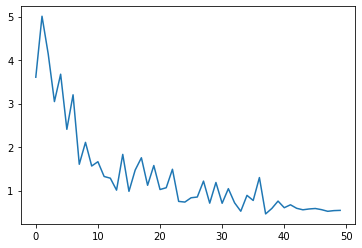

In [45]:
plt.plot(SVD_conv[:50])

The LogLoss quickly converges to a level of around 0.50

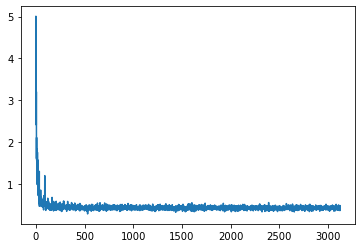

In [46]:
plt.plot(SVD_conv)

even after multiple iterations, the log loss is varies between 0.30 - 0.50 and does not seem to outperform the baseline model. Be mindful of the fact that the model is validated on 300 observations only after each iteration (which could cause the observed volatility. Online learning is not outperforming batch learning at this point in time.

In [47]:
len(SVD_conv) # number of iterations done, after which the loop was terminated manually.

3125

## Online Learning - Naive Bayes

In [50]:
a=0
loops = 3125 #we train the same amount of data as compared to LogReg
model = MultinomialNB(alpha = 0.1)
NB_conv = pd.DataFrame()

for df in reader:
    if a > loops:
        break
    a = a + 1
    y = df.click
    df['hour_corrected'] = df['hour'].apply(lambda x: str(x)[-2:])
    df['day'] = df['hour'].apply(lambda x: str(x)[-4:-2])
    df = df.drop(['hour', 'id', 'site_id', 'site_domain','app_id', 'app_domain', 'device_id','device_model',
                'C14','C17', 'C20','click' ], axis =1 )
    X = encoder.transform(df) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, train_size=0.70, test_size = 0.30)
    model.partial_fit(X_train, y_train, classes = [0,1])
    abc = pd.Series(log_loss(y_test, model.predict_proba(X_test)))
    NB_conv = NB_conv.append(abc, ignore_index=True)
    print(log_loss(y_test, model.predict_proba(X_test)))

4.717367799661105
3.1928637417937997
3.6136989292865103
4.1249230602416445
4.028651152444828
3.7695075041604196
3.653044570530298
3.523092178664086
3.8674235014226612
3.8089942159809
3.19984886470699
3.7599776157417537
3.279155944072271
3.0329584908004596
3.0526438682589263
3.2015737418251895
3.443676901975122
2.933275798988601
3.4577952066733983
4.36867008714137
3.4755054645845243
2.8963780829657675
2.9472199830772463
2.887462896549101
2.7034626942819826
2.860099168261716
3.0697033384711117
3.7876839538325613
3.465065276482362
3.03185193521576
3.7356440892827165
3.7752603214375524
3.0245400825912405
3.2882018210016897
2.8063915952532024
3.7948037513029993
3.2212386186742057
2.904550242569933
3.511252763758324
2.9260292839493522
2.586644927992661
2.6348680757799925
3.1963105951396416
2.8844762919047975
2.703728259582175
2.737975256800453
2.563470074414485
3.0441546761808356
2.950000341193358
2.8927154290967794
2.637476004207194
2.855674815510804
2.4022721641757925
2.699160496375002
2.1

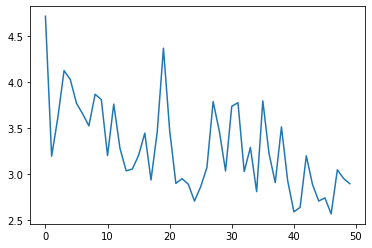

In [51]:
plt.plot(NB_conv[:50])

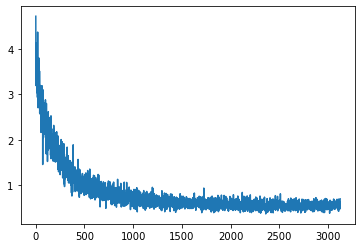

In [52]:
plt.plot(NB_conv)

Compared to logistic regression, NB seems to underperform in terms of i) speed of convergence to a steady state and ii) absolute log loss performance. These results are similar to the performance observed in the baseline models.

## LogReg - OneHotEncoder, ignoring infrequent categories

In [68]:
df_wip = pd.read_csv("train_shuffled.gz", compression='gzip')
df_wip = df_wip.sample(frac=0.1, random_state = 42)
df_wip['hour_corrected'] = df_wip['hour'].apply(lambda x: str(x)[-2:])
df_wip['day'] = df_wip['hour'].apply(lambda x: str(x)[-4:-2])
df_wip = df_wip.drop(['hour', 'id', 'site_id', 'site_domain','app_id', 'app_domain', 'device_id','device_model',
                'C14','C17', 'C20','click' ], axis =1 )
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_wip)

OneHotEncoder(handle_unknown='ignore')

Instead of fitting the OneHotEncoder on the full dataset, we try to fit it on a subsample. Furthermore, we set the parameter "handle_unknown" to ignore. When the OneHotEncoder encounters an unknown value (which will only happen with very obscure/infrequent categories), it will be ignored instead of throwing an error. We will use the logistic model here, because that model outperformed the Naive Bayes model.

In [63]:
model = SGDClassifier(loss = 'log', random_state=42, n_jobs=-2)
loops = 26000
a = 0
SVD_conv = pd.DataFrame()

for df in reader:
    if a > loops:
        break
    a = a + 1
    y = df.click
    df['hour_corrected'] = df['hour'].apply(lambda x: str(x)[-2:])
    df['day'] = df['hour'].apply(lambda x: str(x)[-4:-2])
    df = df.drop(['hour', 'id', 'site_id', 'site_domain','app_id', 'app_domain', 'device_id','device_model',
                'C14','C17', 'C20','click' ], axis =1 )
    X = encoder.transform(df) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, train_size=0.70, test_size = 0.30)
    model.partial_fit(X_train, y_train, classes = [0,1])
    abc = pd.Series(log_loss(y_test, model.predict_proba(X_test)))
    SVD_conv = SVD_conv.append(abc, ignore_index=True)
    print(log_loss(y_test, model.predict_proba(X_test)))

5.089671928084678
4.836226936006994
3.345707211249471
2.947637606396085
2.8678900378057604
5.767744164073533
2.280188977232294
1.6966581524315496
1.9325920493864222
1.7786902136585665
1.7507468295454567
4.231708325197381
1.1628942581961965
2.1067531950660983
1.2857376500688575
1.1908701802186867
1.2178005166131234
1.0302421252417966
0.8472210455772659
0.7889089328508332
0.7683193306672519
0.9805730687522629
0.9543724345319636
0.9878571212913873
0.7129057577048402
0.6488759493830302
0.9075700886887893
1.214683085290011
0.6387300536343938
1.0642200992344062
0.906249165060716
0.7156767916449477
1.2197845177426112
0.59030570276115
0.6972788109328237
0.6566202092016377
0.6472511460552322
0.528091231829639
0.6189000416359572
0.7199089508975226
0.781966443701841
0.5727327356805348
0.4849552246133372
0.7001915527619177
0.6721607153616064
0.6028466579792587
0.6072325468961938
0.6191035248707757
0.4022685028857635
0.5577078089783443
0.7258719193843196
0.587520254626619
0.520124297354905
0.484255

KeyboardInterrupt: 

In [64]:
len(SVD_conv)

25265

Using this method, we are able to train boost performance by a factor 8 in terms of training time (25m rows were trained in 8 hours on a mediocre laptop).

In [74]:
df_test = pd.read_csv("train_shuffled.gz", compression='gzip', nrows= 10000000, skiprows = [1,len(SVD_conv)*1000] )
y_val = df_test.click
df_test['hour_corrected'] = df_test['hour'].apply(lambda x: str(x)[-2:])
df_test['day'] = df_test['hour'].apply(lambda x: str(x)[-4:-2])
df_test = df_test.drop(['hour', 'id', 'site_id', 'site_domain','app_id', 'app_domain', 'device_id','device_model',
                'C14','C17', 'C20','click' ], axis =1 )
X_val = encoder.transform(df_test)
print(log_loss(y_val, model.predict_proba(X_val)))


0.42321503768394514


During Online Training, we constantly checked the performance of the model on 300 rows for each chunk trained. As a final check we validate the peformance on a larger chunk of data (10m rows) that the model has never seen before (25m rows were trained, out of the 40m rows in total). Performance of the model just beats the baseline model trained and performs very well if you compare it to the Kaggle leaderboard performance mentioned earlier. We therefore suggest to implement this model because it is: i) fairly quick to update/train and ii) provides good CTR predictions.

For the avoidance of doubt, the model we are recommending ignores infrequent categories and uses Online Learning with Logistic Regression/SGD.
